# Assignment 02 - Jan 17th, 2018

This notebook presents summary statistical analysis, and multi-variate visualization on the Kaggel King County Housing Price data set. The data set contains over 21k measurements of provided 21 attributes. Key findings are explained and visualized in detail in this document.

First of all, the working directory was set to be able to load the data set into the working space.

In [4]:
# Display the current directiory
getwd()
# Change the working directory 
setwd("/Users/duygusonmez/Desktop/DataScience410/Lecture2/")

[1] "/Users/duygusonmez/Desktop/DataScience410/Lecture2"

Then, the data set was loaded to the working environment.

In [81]:
# Read the csv file
house.data <- read.csv(file = 'kc_house_data.csv', header = TRUE, stringsAsFactors = FALSE)

An overview of the data was presented as below. The first few rows and statistical summary were viewed.

In [8]:
# View the first few rows of the data
head(house.data) 
# Statistical summary of each attribute 
summary(house.data) 

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

Correlation matrix was displayed only for some of the variables to be able to interpret relationships easily. Some of the variables including zip code were eliminated to avoid overplotting. It will be examined seperately in the following part of this notebook. 

                 price sqft_living   condition        view    yr_built
price       1.00000000  0.70877300  0.04057949  0.39664720  0.05835325
sqft_living 0.70877300  1.00000000 -0.05875259  0.28461119  0.31804877
condition   0.04057949 -0.05875259  1.00000000  0.04598974 -0.36141656
view        0.39664720  0.28461119  0.04598974  1.00000000 -0.05343985
yr_built    0.05835325  0.31804877 -0.36141656 -0.05343985  1.00000000
grade       0.69934677  0.76270448 -0.14467367  0.25132058  0.44696320
                 grade
price        0.6993468
sqft_living  0.7627045
condition   -0.1446737
view         0.2513206
yr_built     0.4469632
grade        1.0000000


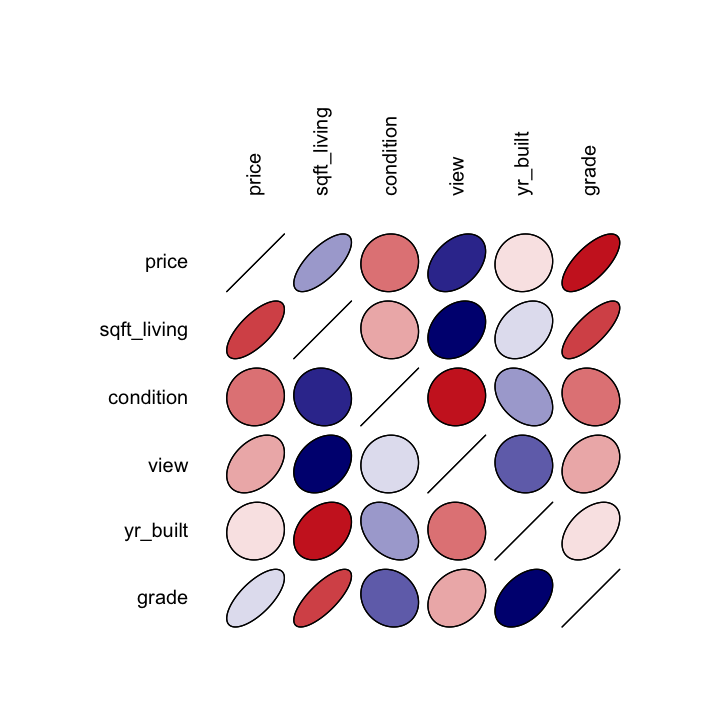

In [88]:
options(repr.plot.width=6, repr.plot.height=6)
library(ellipse)
R = cor(house.data[, c('price', 'sqft_living', 'condition', 'view', 'yr_built', 'grade')], method = 'pearson')
print(R)
plotcorr(R, col = colorRampPalette(c("firebrick3", "white", "navy"))(10))

There is a strong correlation between sqft_living area, condition and price according to the correlation matrix.

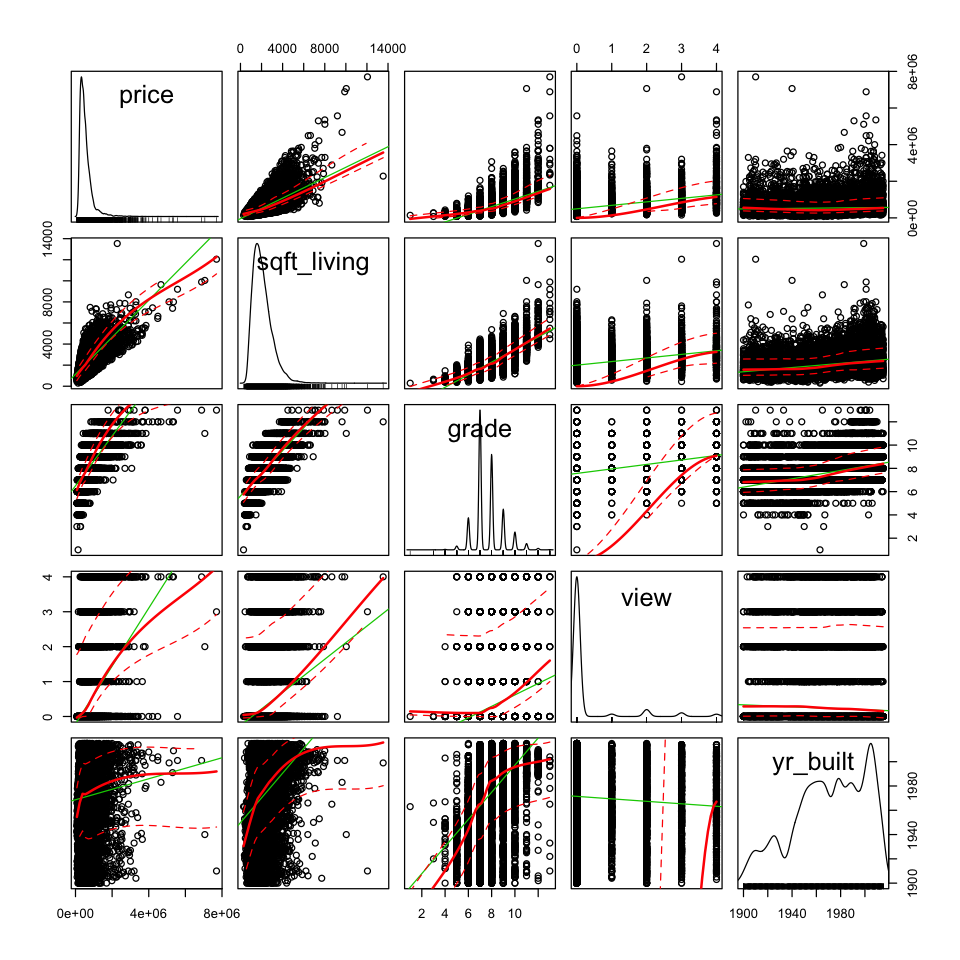

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
require(car)
scatterplotMatrix(~ price + sqft_living + grade + view + yr_built, data = house.data)

Several points could be understood just looking at the scatter plootings above. 
* Price and sqft living area are correlated strongly. 
* Most of the housing in the data set have least favored views.  
* Significant amount of the houses graded around the average levels.
* More houses were built as the time went by. 

### The Distribution of the housing price

The histogram graph of housing price was plotted to see the distribution. First, outlier data was replaced by median value of price to get a meaningful representation.

In [68]:
# Outlier removal. Replace too large values by median price.  

install.packages('data.table')
library(data.table)
outlierReplace = function(dataframe, cols, rows, newValue = NA) {
  if (any(rows)) {
    set(dataframe, rows, cols, newValue)
  }
}

median.price <- median(house.data$price)

outlierReplace(house.data, "price", which(house.data$price > 1500000), newValue=median.price)


The downloaded binary packages are in
	/var/folders/f3/6b_0tmyd6s1czdnr_6_5kc8w0000gn/T//RtmpKNkP6m/downloaded_packages


Then, the plotting was performed as below. The effect of changing the number of bins in a histogram was examined.

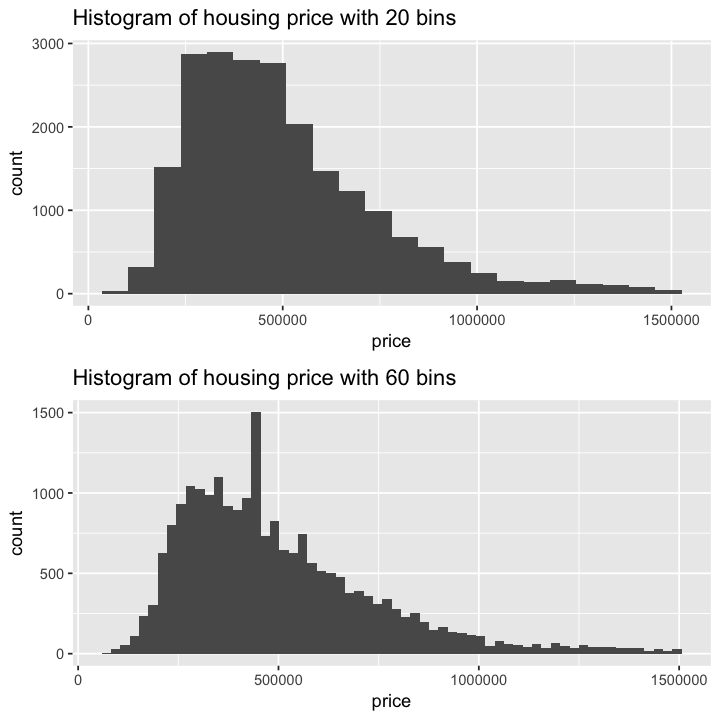

In [69]:
options(repr.plot.width=6, repr.plot.height=6)
bw1 <- (max(house.data$price) - min(house.data$price))/21
bw2 <- (max(house.data$price) - min(house.data$price))/61
require(gridExtra)
require(ggplot2)
p1 <- ggplot(house.data, aes(price)) + geom_histogram(binwidth = bw1) + 
  ggtitle('Histogram of housing price with 20 bins')
p2 <- ggplot(house.data, aes(price)) + geom_histogram(binwidth = bw2) + 
  ggtitle('Histogram of housing price with 60 bins')
grid.arrange(p1, p2, nrow = 2)

## Key Point 1

First, the impact of the grade column on price was examined. 
- Grade is an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. The grade column was broken down into three levels, so that it could be represented clearly on the multi-dimensional plotting surface. The levels were called as above average, average, and below average. 

In [44]:
# Now lets breaking the grade down into three levels that indicate above average, average, and below average. 
# so that we could represent it clearly in the multi-dimensional plotting. 

house.data$grade[which((house.data$grade>=1)&(house.data$grade<7))] <- 'Below average'
house.data$grade[which((house.data$grade>=7)&(house.data$grade<=7))] <- 'Average' 
house.data$grade[which((house.data$grade>=8)&(house.data$grade<=8))] <- 'Average' 
house.data$grade[which((house.data$grade>=9)&(house.data$grade<=9))] <- 'Average' 
house.data$grade[which((house.data$grade>=10)&(house.data$grade<=13))] <- 'Above average' 

The plotting was performed to visualize the relationship between price, sqft_living, and grade. 

Loading required package: ggplot2


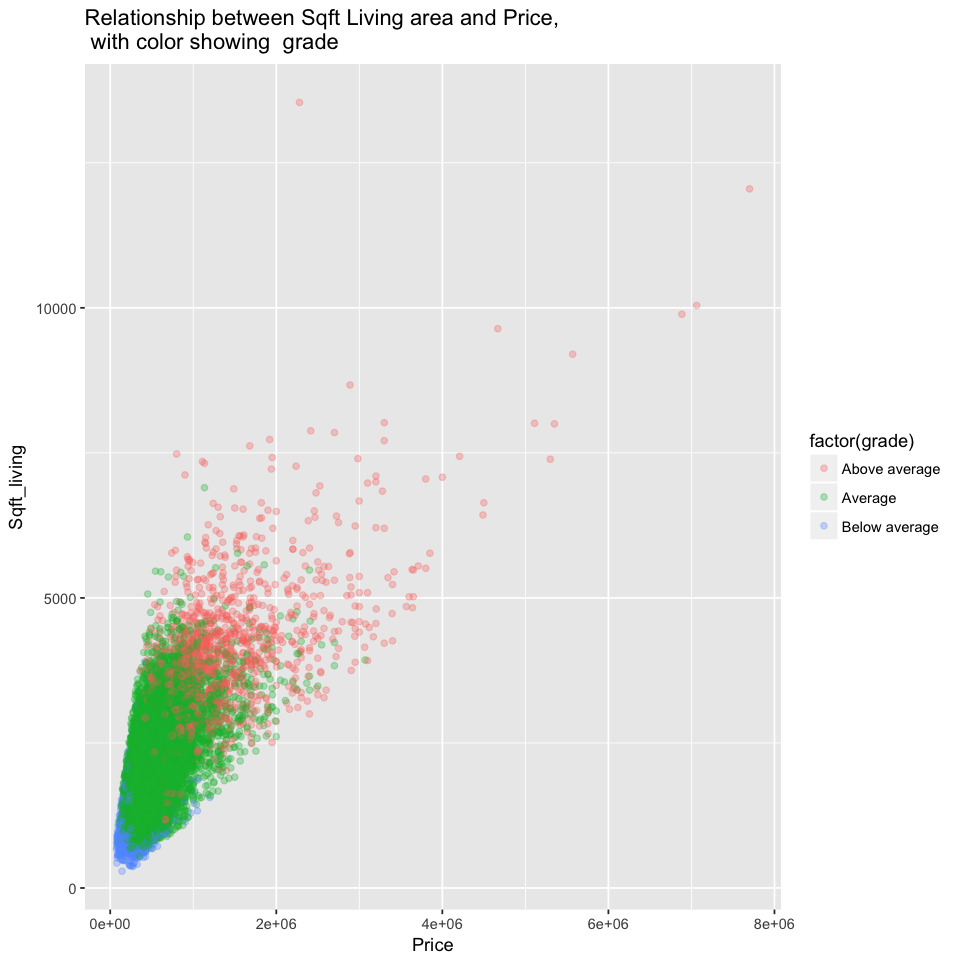

In [54]:
require('ggplot2')
ggplot(house.data, aes(price, sqft_living)) + 
  geom_point(aes(color = factor(grade)), alpha = 0.3) + 
  xlab('Price') + ylab('Sqft_living') + 
  ggtitle('Relationship between Sqft Living area and Price, \n with color showing  grade')

It is obvious that price and sqft_living are correlated to grade. Price and sqft_living are at their least for low levels of grade. Then, price and sqft_living goes up as the grade improves. Finally, they are at their highest for the maximum level of grade. With that said, high quality level of construction and design is provided for the highest price housing with largest living area.  

Although the relationship was evident, some minimal outlier removal was performed to be able to see the pattern clearly.

In [56]:
# Outlier removal. Remove too large values. 

library(data.table)
outlierReplace = function(dataframe, cols, rows, newValue = NA) {
  if (any(rows)) {
    set(dataframe, rows, cols, newValue)
  }
}

outlierReplace(house.data, "sqft_living", which(house.data$sqft_living > 5000), NA)

outlierReplace(house.data, "price", which(house.data$price > 1000000), NA)

Plotting of the cleaned data is presented below. 

Warning message:
“Removed 1492 rows containing missing values (geom_point).”

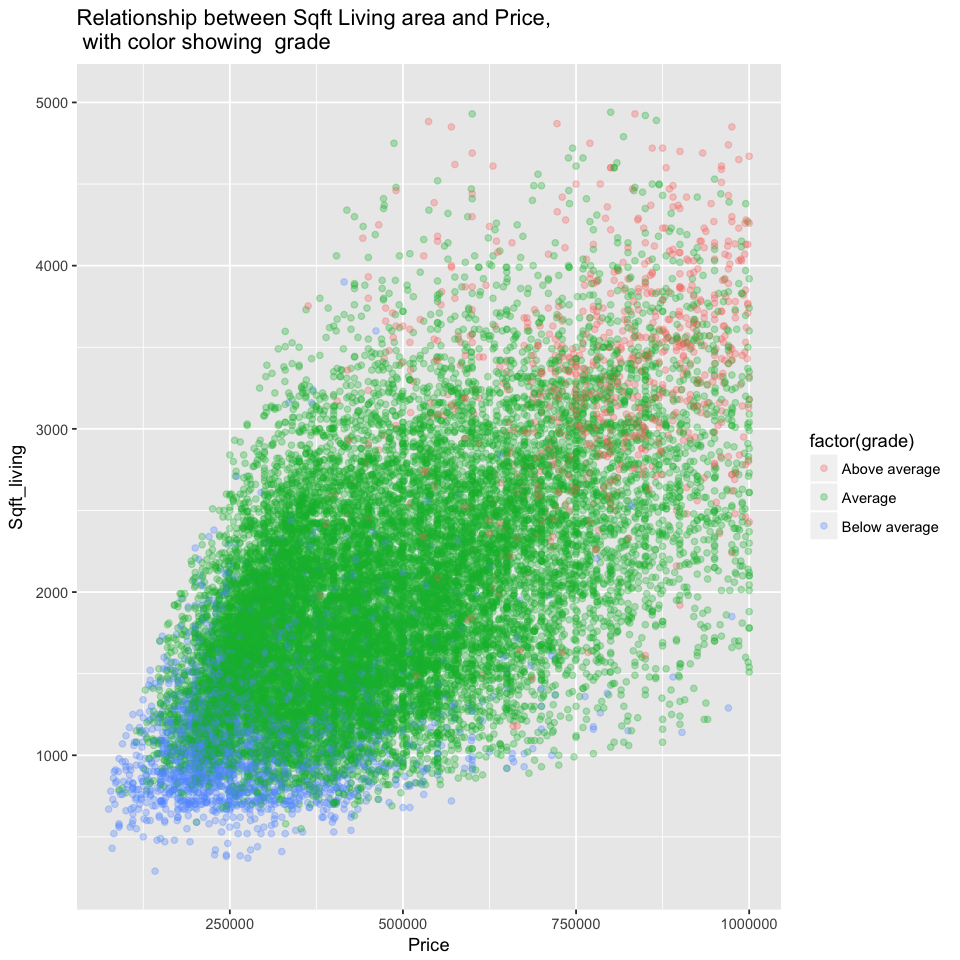

In [58]:
require('ggplot2')
ggplot(house.data, aes(price, sqft_living)) + 
  geom_point(aes(color = factor(grade)), alpha = 0.3) + 
  xlab('Price') + ylab('Sqft_living') + 
  ggtitle('Relationship between Sqft Living area and Price, \n with color showing  grade')

## Key Point 2

Second, the impact of year built on price was examined. Also, the relationship of condition to year built was investigated.
* First, the year built column was divided into five ranges. 

In [70]:
# Now lets look at the relationship between yr_built and price
# I need to divide the yr_built into class range
house.data$yr_built[which((house.data$yr_built>=1900)&(house.data$yr_built<=1926))]<-"1900-1926"
house.data$yr_built[which((house.data$yr_built>1926)&(house.data$yr_built<=1951))]<-"1926-1951"
house.data$yr_built[which((house.data$yr_built>1951)&(house.data$yr_built<=1975))]<-"1951-1975"
house.data$yr_built[which((house.data$yr_built>1975)&(house.data$yr_built<=2000))]<-"1975-2000"
house.data$yr_built[which((house.data$yr_built>2000)&(house.data$yr_built<=2025))]<-"2000-2015"
house.data$yr_built<-factor(house.data$yr_built)

First, I looked at the relationship between price and year built. 

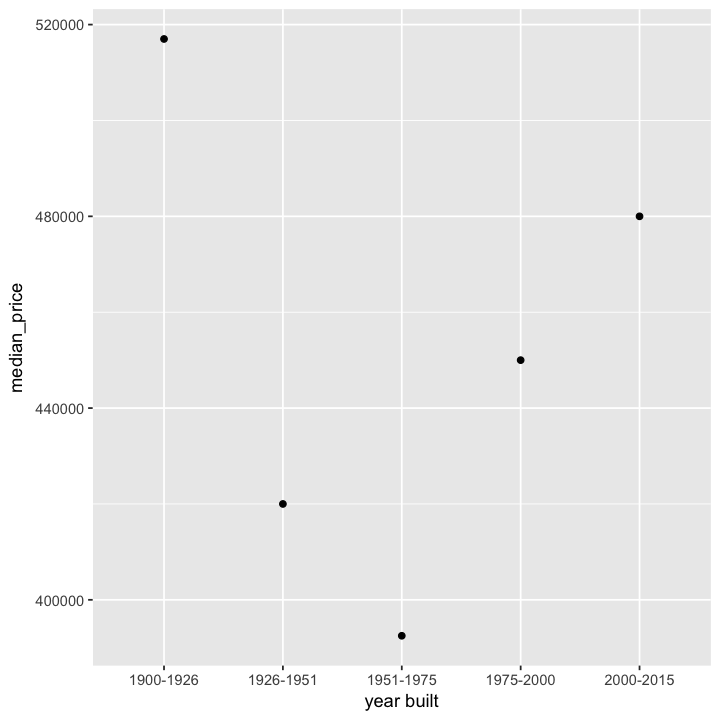

In [75]:
label<-levels(house.data$yr_built)
median_price<-rep(0,5)
for(i in 1:length(label)){
    median_price[i]<-median(house.data$price[house.data$yr_built==label[i]])}
qplot(label,median_price,xlab="year built") 

Then, I looked at the relationship between sqft living area and year built. 

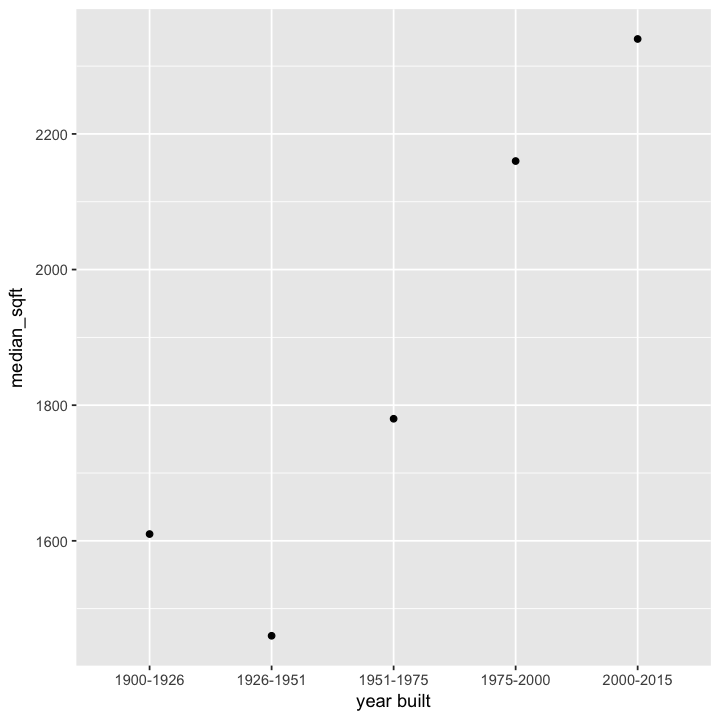

In [78]:
median_sqft<-rep(0,5)
for(i in 1:length(label)){
  median_sqft[i]<-median(house.data$sqft_living[house.data$yr_built==label[i]])}
qplot(label,median_sqft,xlab="year built")   

Prices were higher for the houses built recently. Also, recently built housing has larger living spaces. That would help us to figure out why prices were so high for the recently built properties. However, it is hard to see why the houses that built between 1900-1926 were as expensive as those built after 2000. Let's look at one more variable -condition- that would help us to figure out why so. 

The condition column was broken down into two levels. 

In [72]:
house.data$condition[which((house.data$condition>=1)&(house.data$condition<4))] <- 'Average' 
house.data$condition[which((house.data$condition>=4)&(house.data$condition<=5))] <- 'Good' 

The relationship between price, year built, and condition is represented as below.

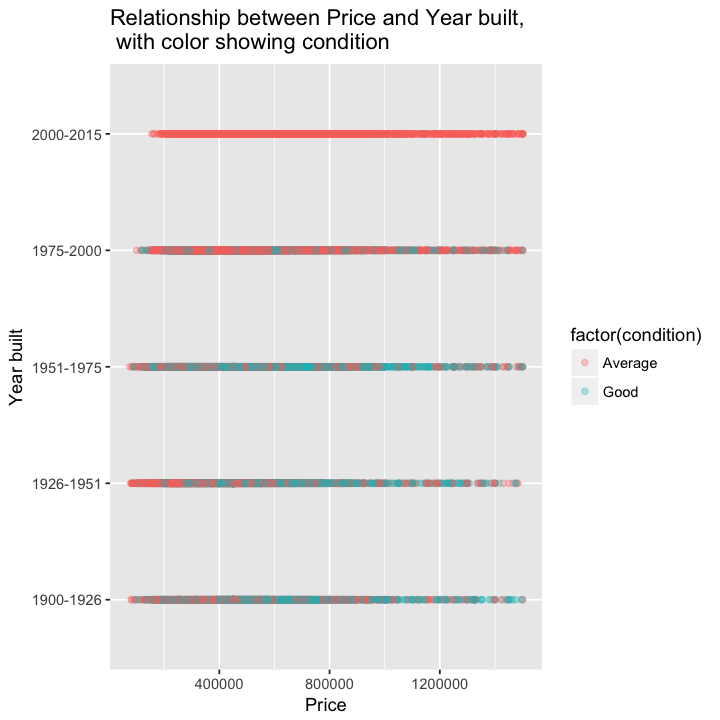

In [79]:
ggplot(house.data, aes(price, yr_built)) + geom_point(aes(color = factor(condition)), 
                                                         alpha = 0.3) + 
  xlab('Price') + ylab('Year built') + 
  ggtitle('Relationship between Price and Year built, \n with color showing condition')

As seen in the figure, the housing was built in better condition from 1900 to 1975. After 2000, the housing industry was dominated by average condition designs. That tells us why housing prices in early 1900s are as high as prices of recently built houses. 

## Key Point 3

Third, the impact of the location on the housing market was examined. The information for over 21k housing at the zipcodes between 98101-98199 was provided in the data set. Zipcodes were divided into six bins in order to get a grasp of housing prices in a certain area. 

In [82]:
# Dividing zip codes into six bins. 
house.data$zipcode[which((house.data$zipcode>=98001)&(house.data$zipcode<=98035))]<-"98001-98035"
house.data$zipcode[which((house.data$zipcode>98036)&(house.data$zipcode<=98070))]<-"98036-98070"
house.data$zipcode[which((house.data$zipcode>98071)&(house.data$zipcode<=98100))]<-"98071-98100"
house.data$zipcode[which((house.data$zipcode>98101)&(house.data$zipcode<=98135))]<-"98101-98135"
house.data$zipcode[which((house.data$zipcode>=98136)&(house.data$zipcode<=98169))]<-"98136-98169"
house.data$zipcode[which((house.data$zipcode>98170)&(house.data$zipcode<=98199))]<-"98170-98199"

Then, some minimal outlier replacement was performed in order to eliminate outliers. The housing prices which were greater than 2M were replaced with 2M price tag. The reason that the greater values were replaced as opposed to getting removed is to get a grasp of pricey housing market in the given area. 

In [83]:
# Outlier replacement. Assign the price values that are greater than 2M$ to 2M$. 

library(data.table)
outlierReplace = function(dataframe, cols, rows, newValue = NA) {
  if (any(rows)) {
    set(dataframe, rows, cols, newValue)
  }
}

outlierReplace(house.data, "price", which(house.data$price > 2000000), 2000000)

The histogram chart of housing price conditioned on zipcode was obtained as below. 

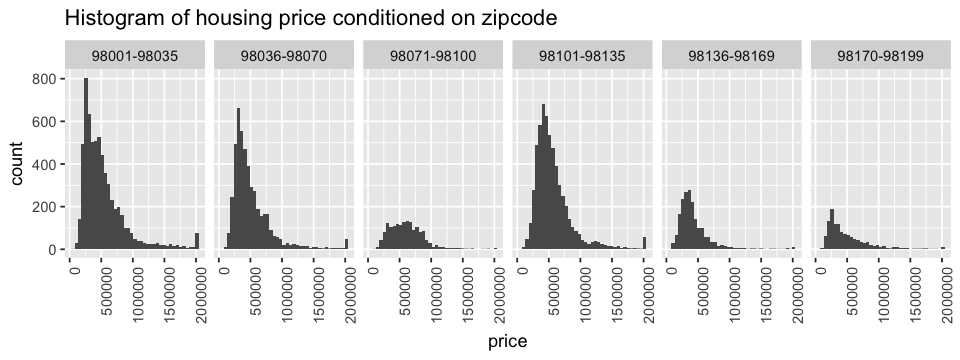

In [87]:
library(repr) 
options(repr.plot.width=8, repr.plot.height=3)
bw1 = (max(house.data$price) - median(house.data$price))/30
ggplot(house.data, aes(price)) + 
  geom_histogram(binwidth = bw1) + 
  facet_grid(. ~ zipcode) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle('Histogram of housing price conditioned on zipcode')

Some significant points could be seen from the plotting above. 
* Housing market is pretty busy in areas with zipcodes between 98001-98035, 98036-98070, and 98101-98135. 
* The houses that are 2M or higher are located in the same areas indicated above. 
* Housing market is dominated with properties under 500k in most of the areas. However, the housing market in the area with zip codes between 98071-98100 is quiet spread out and houses that are slightly over 500k are dominant in this area. 

## Summary

* Price, sqft_living and grade have positive correlation with each other. That means, price is low for housing with relatively smaller living area and lower quality level of construction and design. Price goes up for housing with larger living spaces and better construction and design quality.

* Price of housing that was built between 1900-1926 are as high as that of housing that was built after 2000. Even though the housing that was built between 1900-1926 is old, the condition of those houses is much better compared to the housing that were built recently. It causes the fact that price of old housing is as high as the price of recently built housing. 
* Finally, housing market price was examined by being conditioned on zip code. The location has a tremendous impact on housing price. Housing market is pretty busy in areas with zipcodes between 98001-98035, 98036-98070, and 98101-98135 in terms of having a wide range of housing including the most expensive ones. While the housing market is dominated with properties under 500k in most of the areas, it is pretty spread out in the area with zipcodes 98071-98100 and housing that is slightly over 500k are dominant in this area. 